# Heart Disease Prediction using Neural Networks

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers

C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

## Reading Data

In [2]:
data = pd.read_csv("C:/Users/welcome/Desktop/Heart Disease/dataset.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,0,2,135,250,0,2,161,0,1.4,2,0,3,1
1,59,1,3,150,212,1,0,157,0,1.6,1,0,3,1
2,41,0,2,105,198,0,0,168,0,0.0,1,1,3,1
3,66,1,4,160,228,0,2,138,0,2.3,1,0,6,1
4,40,1,1,140,199,0,0,178,1,1.4,1,0,7,1


In [4]:
data["target"]-=1

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,0,2,135,250,0,2,161,0,1.4,2,0,3,0
1,59,1,3,150,212,1,0,157,0,1.6,1,0,3,0
2,41,0,2,105,198,0,0,168,0,0.0,1,1,3,0
3,66,1,4,160,228,0,2,138,0,2.3,1,0,6,0
4,40,1,1,140,199,0,0,178,1,1.4,1,0,7,0


In [6]:
data_final = pd.get_dummies(data, columns=['sex', 'cp' ,'fbs', 'restecg', 'exang', 'slope', 'ca'])

In [7]:
data_final.head()

,age,trestbps,chol,thalach,oldpeak,thal,target,sex_0,sex_1,cp_1,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3
0,55,135,250,161,1.4,3,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
1,59,150,212,157,1.6,3,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2,41,105,198,168,0.0,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,66,160,228,138,2.3,6,0,0,1,0,...,1,1,0,1,0,0,1,0,0,0
4,40,140,199,178,1.4,7,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0


In [8]:
x = data_final.drop(['target'], axis=1).values
y = data_final['target'].values

## Splitting Data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_train

array([[ 1.41691652,  1.66486104,  0.77327228, ..., -0.51102495,
        -0.38879659,  3.85227206],
       [ 1.08444628,  0.50700194,  1.73025776, ..., -0.51102495,
        -0.38879659, -0.25958707],
       [ 0.64115262,  1.08593149,  0.22642344, ..., -0.51102495,
         2.572039  , -0.25958707],
       ...,
       [-0.35625809, -0.36139239, -0.65244078, ...,  1.95685163,
        -0.38879659, -0.25958707],
       [ 1.08444628,  2.82272014,  1.5349546 , ..., -0.51102495,
        -0.38879659, -0.25958707],
       [-2.24025611, -0.76664307, -1.25788057, ..., -0.51102495,
        -0.38879659, -0.25958707]])

# Classifier 1

In [12]:
np.random.seed(7)
classifier = Sequential()
classifier.add(Dense(30, kernel_initializer = "uniform",activation = "relu", input_dim=26))
classifier.add(Dense(40, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(30, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(10, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
classifier.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size = 10, epochs = 40)
scores1 = classifier.evaluate(x_test, y_test, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 396 samples, validate on 171 samples
Epoch 1/40
396/396 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5657 - val_loss: 0.6916 - val_accuracy: 0.7836
Epoch 2/40
396/396 [==============================] - 0s 930us/step - loss: 0.6565 - accuracy: 0.8434 - val_loss: 0.6036 - val_accuracy: 0.7485
Epoch 3/40
396/396 [==============================] - 0s 986us/step - loss: 0.5018 - accuracy: 0.8384 - val_loss: 0.5277 - val_accuracy: 0.8772
Epoch 4/40
396/396 [==============================] - 0s 910us/step - loss: 0.3948 - accuracy: 0.8788 - val_loss: 0.3789 - val_accuracy: 0.8947
Epoch 5/40
396/396 [==============================] - 0s 978us/step - loss: 0.3020 - accuracy: 0.8864 - val_loss: 0.3328 - val_accuracy: 0.8947
Epoch 6/40
396/396 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8914 - val_loss: 0.3317 - val_accuracy: 0.8830

In [14]:
predictions = classifier.predict(x_test)
y_pred = (predictions > 0.5)
matrix =metrics.confusion_matrix(y_test, y_pred)
print (metrics.classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.91      0.93      0.92        69

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [15]:
precision1=metrics.precision_score(y_test,y_pred,labels=[0,1],average='macro')*100
recall1=metrics.recall_score(y_test,y_pred,labels=[0,1],average='macro')*100
f1_1=metrics.f1_score(y_test,y_pred,labels=[0,1],average='macro')*100
print(precision1,recall1,f1_1)

93.23903818953323 93.43563512361466 93.33380586171457


# Classifier 2

In [16]:
np.random.seed(10)
classifier2 = Sequential()
classifier2.add(Dense(30, kernel_initializer = "uniform",activation = "relu", input_dim=26))
classifier2.add(Dense(40, kernel_initializer = "uniform",activation = "relu"))
classifier2.add(Dense(30, kernel_initializer = "uniform",activation = "relu"))
classifier2.add(Dense(10, kernel_initializer = "uniform",activation = "relu"))
classifier2.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier2.compile(optimizer= "RMSprop",loss = "binary_crossentropy",metrics = ["accuracy"])
classifier2.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size = 10, epochs = 40)
scores2 = classifier2.evaluate(x_test, y_test, verbose=0)

Train on 396 samples, validate on 171 samples
Epoch 1/40
396/396 [==============================] - 2s 4ms/step - loss: 0.6915 - accuracy: 0.5253 - val_loss: 0.6846 - val_accuracy: 0.7485
Epoch 2/40
396/396 [==============================] - 0s 829us/step - loss: 0.6359 - accuracy: 0.8308 - val_loss: 0.5855 - val_accuracy: 0.8363
Epoch 3/40
396/396 [==============================] - 0s 872us/step - loss: 0.4964 - accuracy: 0.8535 - val_loss: 0.4733 - val_accuracy: 0.8538
Epoch 4/40
396/396 [==============================] - 0s 824us/step - loss: 0.3797 - accuracy: 0.8485 - val_loss: 0.3741 - val_accuracy: 0.8655
Epoch 5/40
396/396 [==============================] - 0s 758us/step - loss: 0.3228 - accuracy: 0.8662 - val_loss: 0.3326 - val_accuracy: 0.8772
Epoch 6/40
396/396 [==============================] - 0s 624us/step - loss: 0.3079 - accuracy: 0.8662 - val_loss: 0.3193 - val_accuracy: 0.8830
Epoch 7/40
396/396 [==============================] - 0s 622us/step - loss: 0.2987 - accurac

In [17]:
predictions = classifier2.predict(x_test)
y_pred = (predictions > 0.5)
matrix =metrics.confusion_matrix(y_test, y_pred)
print (metrics.classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       102
           1       0.90      0.94      0.92        69

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [18]:
precision2=metrics.precision_score(y_test,y_pred,labels=[0,1],average='macro')*100
recall2=metrics.recall_score(y_test,y_pred,labels=[0,1],average='macro')*100
f1_2=metrics.f1_score(y_test,y_pred,labels=[0,1],average='macro')*100
print(precision2,recall2,f1_2) 

93.11868686868688 93.67007672634271 93.36297237218164


# Classifier 3

In [19]:
np.random.seed(5)
classifier3 = Sequential()
classifier3.add(Dense(30, kernel_initializer = 'uniform',activation = "relu", input_dim=26))
classifier3.add(Dense(40, kernel_initializer ='uniform', activation = "relu"))
classifier3.add(Dense(30, kernel_initializer = 'uniform',activation = "relu"))
classifier3.add(Dense(10, kernel_initializer ='uniform',activation = "relu"))
classifier3.add(Dense(1, kernel_initializer = 'uniform',activation = "sigmoid"))
classifier3.compile(optimizer= "RMSprop", loss = "binary_crossentropy",metrics = ["binary_accuracy"])
classifier3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size = 10, epochs = 40)
scores = classifier3.evaluate(x_test, y_test, verbose=0)

Train on 396 samples, validate on 171 samples
Epoch 1/40
396/396 [==============================] - 1s 3ms/step - loss: 0.6888 - binary_accuracy: 0.5429 - val_loss: 0.6655 - val_binary_accuracy: 0.7953
Epoch 2/40
396/396 [==============================] - 0s 960us/step - loss: 0.5917 - binary_accuracy: 0.8510 - val_loss: 0.4671 - val_binary_accuracy: 0.8889
Epoch 3/40
396/396 [==============================] - 0s 925us/step - loss: 0.4393 - binary_accuracy: 0.8485 - val_loss: 0.3550 - val_binary_accuracy: 0.8713
Epoch 4/40
396/396 [==============================] - 0s 983us/step - loss: 0.3429 - binary_accuracy: 0.8636 - val_loss: 0.3183 - val_binary_accuracy: 0.8655
Epoch 5/40
396/396 [==============================] - 0s 1ms/step - loss: 0.3107 - binary_accuracy: 0.8712 - val_loss: 0.3311 - val_binary_accuracy: 0.8889
Epoch 6/40
396/396 [==============================] - 0s 955us/step - loss: 0.2990 - binary_accuracy: 0.8763 - val_loss: 0.3137 - val_binary_accuracy: 0.9123
Epoch 7/40

In [20]:
predictions = classifier3.predict(x_test)
y_pred = (predictions > 0.5)
matrix =metrics.confusion_matrix(y_test, y_pred)
print (metrics.classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       102
           1       0.90      0.96      0.93        69

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [21]:
precision3=metrics.precision_score(y_test,y_pred,labels=[0,1],average='macro')*100
recall3=metrics.recall_score(y_test,y_pred,labels=[0,1],average='macro')*100
f1_3=metrics.f1_score(y_test,y_pred,labels=[0,1],average='macro')*100
print(precision3,recall3,f1_3)

93.67486720715684 94.39471440750214 93.97887323943662


# Accuracies

In [22]:
print(scores1,scores2,scores)

[0.4194752870247378, 0.9356725215911865] [0.33021651095117044, 0.9356725215911865] [0.43850217071193004, 0.9415204524993896]


# Comparing 3 Classifiers

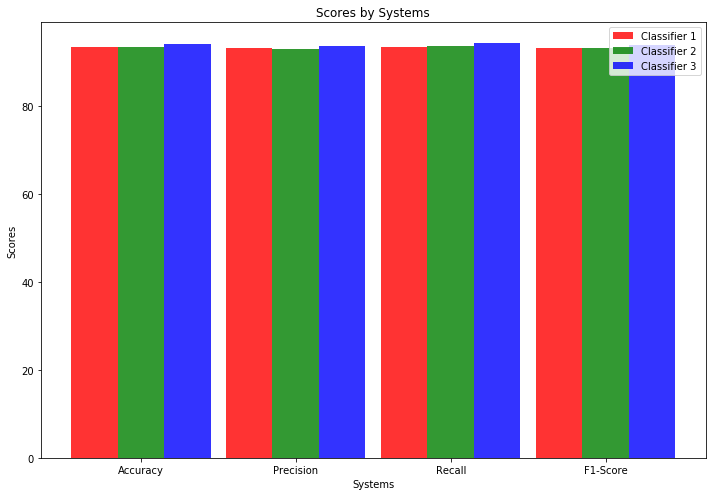

In [23]:
n_groups = 4
classifier_1 = (scores1[1]*100,precision1,recall1,f1_1)
classifier_2 = (scores2[1]*100,precision2,recall2,f1_2)
classifier_3 = (scores[1]*100,precision3,recall3,f1_3)
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

rects1 = plt.bar(index, classifier_1, bar_width,
alpha=opacity,
color='r',
label='Classifier 1')

rects2 = plt.bar(index + bar_width, classifier_2, bar_width,
alpha=opacity,
color='g',
label='Classifier 2')

rects3 = plt.bar(index + 2*bar_width, classifier_3, bar_width,
alpha=opacity,
color='b',
label='Classifier 3')


plt.xlabel('Systems')
plt.ylabel('Scores')
plt.title('Scores by Systems')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F1-Score'))
plt.legend()


plt.tight_layout()
plt.show()

### Result: Classifier 1 is the Best Classifier in predicting Heart Disease 